In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'E:\\Data Analysis\Data analysis 01.03.2022\Machine-Learning\Studymart\Class20_stat\weight_height.csv')

In [3]:
#chcking the 5 rows data
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
#This is the mean of data points according to columns
data.mean()

Height     66.809925
Weight    165.632735
dtype: float64

In [5]:
data.Height.std()

3.851454431577277

In [6]:
#We will import StandardScaler from sklearn
#StandardScaler is as the another anme of Zscores
from sklearn.preprocessing import StandardScaler

In [7]:
df1=data.copy()

In [8]:
m = StandardScaler()
df1.Height = m.fit_transform(data[['Height']])

In [9]:
#This the mean of zscores or standardScalers
df1.mean()

Height   -1.140902e-15
Weight    1.656327e+02
dtype: float64

In [10]:
df1.Height.mean() #tends to 0

-1.1409017765855758e-15

In [11]:
df1.Height.std() #standard deviation(SD)---> 1

1.0000584504778822

<AxesSubplot:xlabel='Height', ylabel='Count'>

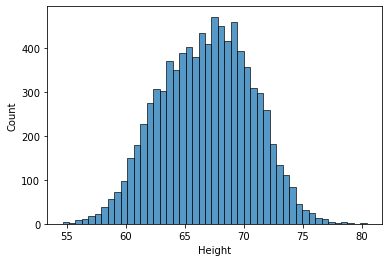

In [12]:
#Now if we want to see the column data distribution we can check by histplot from seaborn library
sns.histplot(data.Height)

<AxesSubplot:xlabel='Height', ylabel='Count'>

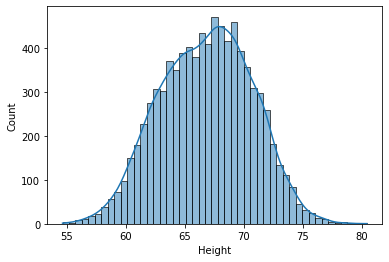

In [13]:
#If we wnat to bell  curve, we have to add additional parameter kde=True,where kde means that kerneldensity estimation
sns.histplot(data.Height, kde=True)

In [14]:
#For checking dtandard deviation
'''the rules of SD, SD=sqrt((summation(|x-x_bar|**2)/n))
where,x=each datapoin value
x_bar=mean value of that column
n=number of samples'''
#But in python language we can easily calculate by following code
data.Height.std()

3.851454431577277

In [15]:
#For Checking varience
'''the rules of varience, var=((summation(|x-x_bar|**2))/n)
where,x=each datapoin value
x_bar=mean value of that column
n=number of samples'''
#if we remove sqrt from standard deviation it will become varience
#But in python we can calculate by following code

data.Height.var()

14.833701238516245

# remove Outlier

In [16]:
#for removing outlier, we have to calculate stsandard deviation and mean value
#we have to select x-varable
mean_value =data['Height'].mean()
mean_value

66.80992512908925

In [17]:
std_height=data['Height'].std()
print(std_height)

3.851454431577277


In [18]:
#in normal distribution we have seen mean value position in the middle
#from mean value to 3-positive standard deviation is as counted as positive_std_3
#from mean value to 3 negative standard deviation is as counted as negative_std_3
#Because we know that -3standard deviation to +3standard deviation data will be found 99.6% according to normal distribution 
positive_std_3 = mean_value + (3*std_height)
negative_std_3 = mean_value - (3*std_height)

In [19]:
positive_std_3

78.36428842382108

In [20]:
negative_std_3

55.25556183435742

In [21]:
#Now we can check data points which are greater than 3positive standard deviation
data[data.Height > positive_std_3]

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675


In [22]:
#which datas are lower than negative_std_3
data[data.Height < negative_std_3]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [24]:
data.shape

(8555, 3)

In [25]:
#here,8555 rows and 3 columns.since we know that .4% datas will out side of the -3std to +3std,
#Thus, the outside of this range, the number of datas will be
(8555*.4)/100

34.22

In [26]:
#Almost 34 data will be outlier, but we have got 8 datas only. Because This dataset is not normally distributed

In [30]:
#Now we will remove the .4% datas
#Here we have keep which datas are greater than -3std and which are smaller than +3std
remove_data = data[(data.Height > negative_std_3) & (data.Height < positive_std_3)]

In [31]:
remove_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


<AxesSubplot:xlabel='Height', ylabel='Count'>

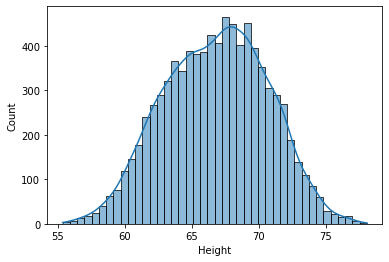

In [32]:
#now we can see histplot after removing
sns.histplot(remove_data.Height, kde=True)

<AxesSubplot:xlabel='Height', ylabel='Count'>

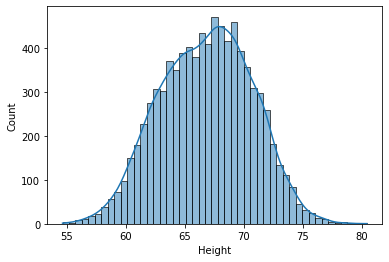

In [34]:
#Before removing
#we easilly compare the range of Height
sns.histplot(data.Height, kde=True)

# Z Score calculating

In [37]:
#This is the equation of z scores calculations
# z = ((x-mean_value)/standard deviation)
data['Zscores']=(data['Height']-data.Height.mean())/data.Height.std()

In [38]:
data.head()

,Gender,Height,Weight,Zscores
0,Male,73.847017,241.893563,1.827126
1,Male,68.781904,162.310473,0.512009
2,Male,74.110105,212.740856,1.895435
3,Male,71.730978,220.042470,1.277713
4,Male,69.881796,206.349801,0.797587


<AxesSubplot:xlabel='Zscores', ylabel='Count'>

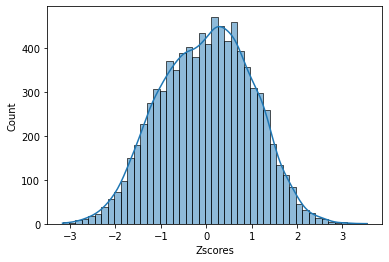

In [39]:
#Now we can check standard deviation plot according to ZScores values
sns.histplot(data.Zscores, kde=True)

In [40]:
data.Zscores.mean()

4.534088540686986e-14

In [41]:
data.Zscores.std()

0.999999999999998